In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/fact_sale.csv')

In [23]:
df.head()

,TRANSACTION_DATE,CUSTOMER_ID,PRODUCT,REGION,QUANTITY,PRICE,DISCOUNT_PCT,TOTAL_REVENUE
0,2022-10-21,CUST_32167,Product_8109,Asia,4,805.51,3.63,3105.08
1,2022-07-25,CUST_79483,Product_7873,Europe,1,92.96,1.83,91.26
2,2023-08-24,CUST_97186,Product_9334,Europe,3,700.87,21.86,1642.98
3,2023-11-23,CUST_50953,Product_1364,Asia,3,507.21,14.67,1298.41
4,2022-04-11,CUST_43293,Product_9899,Europe,5,985.92,26.19,3638.54


In [5]:
df.tail()

,TRANSACTION_DATE,CUSTOMER_ID,PRODUCT,REGION,QUANTITY,PRICE,DISCOUNT_PCT,TOTAL_REVENUE
500039,2025-01-17,CUST_AUTO_1,Bluetooth Speaker,Asia,1,60.0,10.0,54.0
500040,2025-01-16,CUST_STREAM_TEST,Test Product,Asia,1,10.0,0.0,10.0
500041,2025-01-17,CUST_AUTO_1,Bluetooth Speaker,Asia,1,60.0,10.0,54.0
500042,2025-01-16,CUST_STREAM_TEST,Test Product,Asia,1,10.0,0.0,10.0
500043,2025-01-17,CUST_AUTO_1,Bluetooth Speaker,Asia,1,60.0,10.0,54.0


### Basic EDA

In [6]:
df.shape

(500044, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500044 entries, 0 to 500043
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   TRANSACTION_DATE  500044 non-null  object 
 1   CUSTOMER_ID       500044 non-null  object 
 2   PRODUCT           500044 non-null  object 
 3   REGION            500044 non-null  object 
 4   QUANTITY          500044 non-null  int64  
 5   PRICE             500044 non-null  float64
 6   DISCOUNT_PCT      500044 non-null  float64
 7   TOTAL_REVENUE     500044 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 30.5+ MB


In [8]:
df.isnull().sum()

,0
TRANSACTION_DATE,0
CUSTOMER_ID,0
PRODUCT,0
REGION,0
QUANTITY,0
PRICE,0
DISCOUNT_PCT,0
TOTAL_REVENUE,0


In [9]:
df.describe()

,QUANTITY,PRICE,DISCOUNT_PCT,TOTAL_REVENUE
count,500044.000000,500044.000000,500044.000000,500044.000000
mean,3.001552,502.691712,14.972688,1282.363663
std,1.414322,286.943309,8.668126,1022.595263
min,1.000000,5.000000,0.000000,3.580000
25%,2.000000,254.910000,7.450000,469.597500
50%,3.000000,502.260000,14.980000,993.165000
75%,4.000000,751.240000,22.470000,1890.422500
max,5.000000,999.990000,30.000000,4988.910000


### simple visual

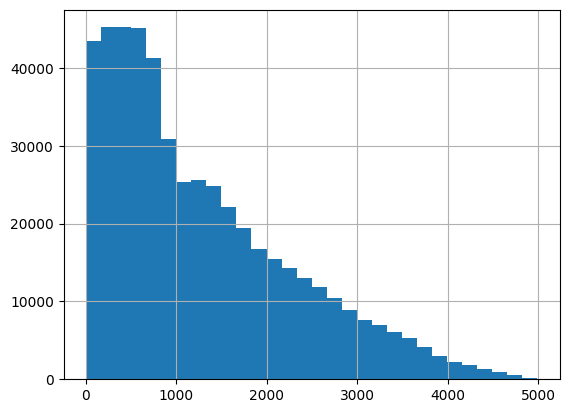

In [10]:
# revenue distribution
plt.figure()
df['TOTAL_REVENUE'].hist(bins=30)
plt.show()

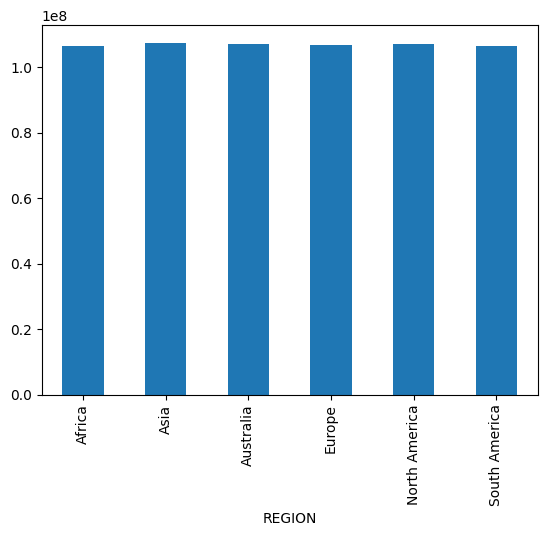

In [11]:
#region wise revenue
df.groupby('REGION')['TOTAL_REVENUE'].sum().plot(kind="bar")
plt.show()

In [12]:
# date feature engineering
df['TRANSACTION_DATE'] = pd.to_datetime(df['TRANSACTION_DATE'])

df['Year'] = df['TRANSACTION_DATE'].dt.year
df['Month'] = df['TRANSACTION_DATE'].dt.month
df['Day'] = df['TRANSACTION_DATE'].dt.day
df['Weekday'] = df['TRANSACTION_DATE'].dt.weekday

In [13]:
# drop original date column
df.drop(columns = ["TRANSACTION_DATE"], inplace=True)

In [14]:
#drop customer id column
df.drop(columns=["CUSTOMER_ID"], inplace=True)

In [15]:
# Handle categorical features
cat_cols = ["PRODUCT", "REGION"]
num_cols = df.drop(columns=cat_cols).columns.tolist()

cat_cols, num_cols


(['PRODUCT', 'REGION'],
 ['QUANTITY',
  'PRICE',
  'DISCOUNT_PCT',
  'TOTAL_REVENUE',
  'Year',
  'Month',
  'Day',
  'Weekday'])

In [16]:
# One-Hot Encoding
df_encode = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [18]:
df_encode.head()

,QUANTITY,PRICE,DISCOUNT_PCT,TOTAL_REVENUE,Year,Month,Day,Weekday,PRODUCT_Product_1,PRODUCT_Product_10,...,PRODUCT_Product_9996,PRODUCT_Product_9997,PRODUCT_Product_9998,PRODUCT_Product_9999,PRODUCT_Test Product,REGION_Asia,REGION_Australia,REGION_Europe,REGION_North America,REGION_South America
0,4,805.51,3.63,3105.08,2022,10,21,4,False,False,...,False,False,False,False,False,True,False,False,False,False
1,1,92.96,1.83,91.26,2022,7,25,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,3,700.87,21.86,1642.98,2023,8,24,3,False,False,...,False,False,False,False,False,False,False,True,False,False
3,3,507.21,14.67,1298.41,2023,11,23,3,False,False,...,False,False,False,False,False,True,False,False,False,False
4,5,985.92,26.19,3638.54,2022,4,11,0,False,False,...,False,False,False,False,False,False,False,True,False,False


In [19]:
# feature product column
product_cols = [col for col in df_encode.columns if col.startswith("PRODUCT")]
len(product_cols)


10001

In [20]:
#drop product column

df_encode.drop(columns=product_cols, inplace=True)

In [21]:
df_encode.head()

,QUANTITY,PRICE,DISCOUNT_PCT,TOTAL_REVENUE,Year,Month,Day,Weekday,REGION_Asia,REGION_Australia,REGION_Europe,REGION_North America,REGION_South America
0,4,805.51,3.63,3105.08,2022,10,21,4,True,False,False,False,False
1,1,92.96,1.83,91.26,2022,7,25,0,False,False,True,False,False
2,3,700.87,21.86,1642.98,2023,8,24,3,False,False,True,False,False
3,3,507.21,14.67,1298.41,2023,11,23,3,True,False,False,False,False
4,5,985.92,26.19,3638.54,2022,4,11,0,False,False,True,False,False


### Machine Learning

In [22]:
# train test split
from sklearn.model_selection import train_test_split
X = df_encode.drop(columns=["TOTAL_REVENUE"])
y = df_encode["TOTAL_REVENUE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train.shape

(400035, 12)

In [24]:
X_test.shape

(100009, 12)

In [25]:
# model import and train
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# prediction model
y_pred = model.predict(X_test)

In [27]:
# evalute model
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression MAE:", mae)
print("Linear Regression R2:", r2)

Linear Regression MAE: 268.3450492991509
Linear Regression R2: 0.8751140021027206


In [28]:
# randomforest model
from sklearn.ensemble import RandomForestRegressor

In [29]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [30]:
# prediction model
y_pred_rf = rf_model.predict(X_test)

In [31]:
# evalute model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest MAE:", mae_rf)
print("Random Forest R2:", r2_rf)

Random Forest MAE: 1.1639948724614826
Random Forest R2: 0.9999969255531189
